#Importance Sampling

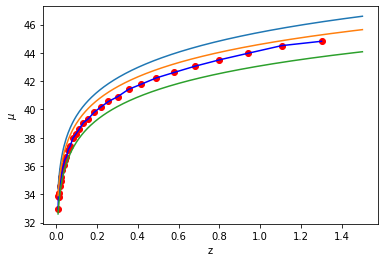

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math as math
from scipy import random
from random import gauss
%matplotlib inline
# Reading the covariance matrix and reshaping it into 31x31 matrix.

cov = np.loadtxt(r"/content/jla_mub_covmatrix.txt",unpack=True).reshape(31,31)
#cov=cov.reshape(31,31)
InvC = np.linalg.inv(cov)

# Read in the Supernova data file:
z,mu=np.loadtxt(r"/content/jla_mub.txt",delimiter=" ",unpack=True)

# Number of MCMC samples and number of parameters:
nsamples = 10000
npars    = 2

# Sigma for each parameters:
sigomega=0.01
sigmu=0.01

# number of data points:
n = 31

# Functions to approximate the luminosity distance and distance modulus:
def mu_model(z,Omegam,h):
    # Distance modulus at redshift z, for flat Universe with parameters Omegam, h
    mu_model=25.0 - 5.0*math.log10(h) + 5.0*math.log10(DLstar(z,Omegam))
    return mu_model

def DLstar(z,Omegam):
    # Luminosity Distance at redshift z, in Mpc/h, for flat Universe with parameters Omegam, h
    DLval=3000.0*(1.0+z)*(eta(1.0,Omegam)-eta(1.0/(1.0+z), Omegam))
    return DLval

def eta( a, Omegam ):
    s=math.pow(1.0/Omegam-1.0,1.0/3.0)
    etaval=2.0 * math.sqrt(math.pow(s,3)+1.0) * math.pow(math.pow(a,-4)-0.1540*s*math.pow(a,-3)+
                                                           0.4304*math.pow(s,2)*math.pow(a,-2)+
                                                            0.19097*math.pow(s,3)/a+
                                                        0.066941*math.pow(s,4),-0.125)   
    return etaval

diff = np.empty(n)
# Plot the data:
plt.plot(z,mu,'ro',z,mu,'b')
npts    = 300
z_plot  = np.linspace(0.01, 1.5, npts)
mu_plot = np.empty(npts)

# Plot a few theoretical curves on top of the data:
for i in range (npts):
    mu_plot[i]=mu_model(z_plot[i], 0.2, 0.4) #PLOTTING MU(Y) PLOT AS A FUNCTION OF VARIABLE Z(x)(CREATED USING LINSPACE)with PARAMETER 0.2,0.4
plt.plot(z_plot,mu_plot)
plt.xlabel('z')
plt.ylabel(r'$\mu$')
for i in range (npts):
    mu_plot[i] = mu_model(z_plot[i], 0.5, 0.5)
plt.plot(z_plot,mu_plot)
for i in range (npts):
    mu_plot[i] = mu_model(z_plot[i], 0.8, 0.9)
plt.plot(z_plot,mu_plot)
plt.show()



# Defining likelihood function for parameters omega and h:

def lnL(Omegam, h):
    "Ln of likelihood for flat Universe and SN distance modulus data"

# Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0 or h<=0):
        lnL = -1.e100
    else:
            
# Compute difference with theory mu at redshifts of the SN, for trial Omegam, h:
        for j in range (n):
            diff[j] = mu[j]-mu_model(z[j],Omegam,h)

# Compute ln(likelihood) assuming gaussian errors (double sum done using vector/matrix ops):
        lnL = -0.5*np.dot(diff,np.dot(InvC,diff))
        
    return lnL

#Sampling from approximate distribution(Importance)

#for h parameter

acceptance rate = 88.8
mean value of h 0.7415930204179646


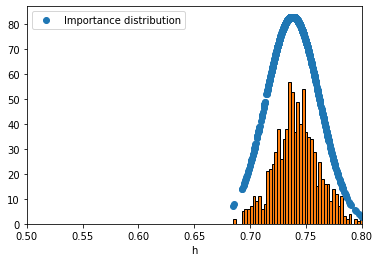

In [ ]:
def fx(v):                                                   #sampling from gaussian distribution for h with mean and variance as given in assignment
    y=np.exp(-(((v-0.738)/0.024)**2)/2)/(0.024*np.sqrt(2*np.pi))  
    return y
 
x=[]

alpha=0
x.append(np.random.uniform())
xacc=[]
for i in range(1,1000):
    x.append(gauss(x[i-1],0.01))

    alpha=np.minimum(1,fx(x[i])/fx(x[i-1]))
    if alpha>1:                                                #M-H algo
        xacc.append(x[i])


    else: 
        ui=np.random.uniform()
        if ui<alpha:
            xacc.append(x[i])
        else:
            x[i]=x[i-1]
l=[i for i in range(len(xacc))]
fn=[]
for i in range(len(xacc)):
    fn.append(fx(xacc[i]))
plt.xlabel('h')
plt.plot(xacc,[i*5 for i in fn],'o',label='Importance distribution')
plt.legend()
plt.hist(xacc,bins=50,ec='black')
print("acceptance rate =",(len(xacc)/len(x))*100)
print("mean value of h",np.mean(xacc))
plt.xlim(0.5,0.8)
plt.show()

#for omega parameter

acceptance rate = 87.1
mean value of omega 0.32035034770967147


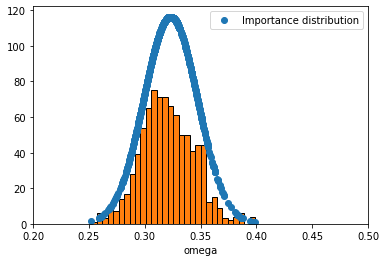

In [ ]:
def fx2(v):
    y=np.exp(-(((v-0.323)/0.024)**2)/2)/(0.024*np.sqrt(2*np.pi))  #sampling from gaussian distribution for Omegam with given mean and variance
    return y

y=[]

alpha=0
y.append(gauss(0.3,0.01))
yacc=[]
for i in range(1,1000):
    y.append(gauss(y[i-1],0.01))

    alpha=np.minimum(1,fx2(y[i])/fx2(y[i-1]))
    if alpha>1:
        yacc.append(y[i])


    else: 
        ui=np.random.uniform()
        if ui<alpha:
            yacc.append(y[i])
        else:
            y[i]=y[i-1]
l=[i for i in range(len(yacc))]

#plt.scatter(xacc[100:],l[100:],c=xacc[100:])
fn1=[]
for i in range(len(yacc)):
    fn1.append(fx2(yacc[i]))
plt.xlabel('omega')
plt.plot(yacc,[i*7 for i in fn1],'o',label='Importance distribution')
plt.legend()
plt.hist(yacc,bins=30,ec='black')
print("acceptance rate =",(len(yacc)/len(y))*100)
print('mean value of omega',np.mean(yacc))
plt.xlim(0.2,0.5)
plt.show()

#correction for target distribution (self-normalised importance sampling for non uniform target)

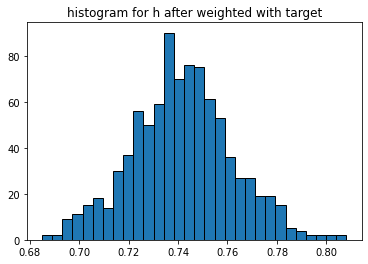

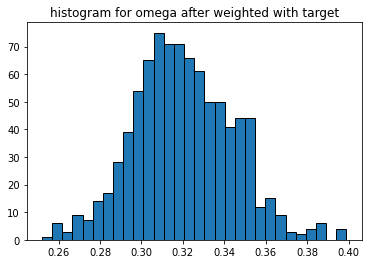

mean value of h using importance sampling= 0.7024862184921496
standard deviation in h = 0.02023552790584622
mean value of omega using importance sampling= 0.30252522056829884
standard deviation in omegam = 0.023910938717171037


In [ ]:
trueh=[]
def lnLh(h):                                                  #target distribution (likelihood) for h
    hh=np.exp(lnL(0.30,h))               
    return hh
lnh=[]
for i in range(len(xacc)):
    lnh.append(lnLh(xacc[i]))
s=[]
for i in range(len(xacc)):
    s.append(lnh[i]/fn[i])
    trueh.append((xacc[i]*lnh[i])/fn[i])                       #weighted values 
trueO=[]
def lnLo(o):                                                    #target for omega 
    oo=np.exp(lnL(o,0.70))            
    return oo
lno=[]
s1=[]
for i in range(len(yacc)):
    lno.append(lnLo(yacc[i]))
for i in range(len(yacc)):
    s1.append(lno[i]/fn1[i])
    trueO.append((yacc[i]*lno[i])/fn1[i])
plt.title('histogram for h after weighted with target')
truehh=[]
for j in range(len(xacc)):
    truehh.append(trueh[j]/s[j])
plt.hist(truehh,bins=30,ec='black')
plt.show()
plt.title('histogram for omega after weighted with target')

trueOO=[]
for j in range(len(yacc)):
    trueOO.append(trueO[j]/s1[j])

plt.hist(trueOO,bins=30,ec='black')
plt.show()
print("mean value of h using importance sampling=",np.mean(trueh)/np.mean(s))            #self-normalised importance sampling method 
print("standard deviation in h =",np.std(truehh))
print("mean value of omega using importance sampling=",np.mean(trueO)/np.mean(s1))
print("standard deviation in omegam =",np.std(trueOO))

